# Example of analysis script to get upper limits using csdmatter app

The goal is to show you how to use the csdmatter app to compute exclusion limits to the lifetime of dark matter candidates using the PPPC4DMID tables.

We start by importing `gammalib` and `ctools`, alongside the ```csdmatter``` tool.

In [1]:
#   Default imports
import gammalib
import ctools
import cscripts

from ctaAnalysis.csdmatter import csdmatter

import matplotlib.pyplot as plt
%matplotlib inline

import os

We used the observation from the previous example notebook `dmsimulation.ipynb`. You can use your own observations too. As other `ctools` and `gammalib` apps, you can directly pass the observation container from other tools/apps, either On or OnOff observations :).

In [2]:
#   Name of fits with events from a dm simulation
#   The fits I am using here is obtained from 
#   the example "Simulation of gamma-ray emission from a Toy Dark halo"
file = 'Haloobssim.fits'

## Input parameters

The following shows all the input parameters required to initialize the `csdmatter` class.

Don't forget to pass the dark matter spectrum (fits) file. You can check the notebook ```tablemodel``` folder to create your spectrum files.

In [3]:
#   csdmatter App input parameters
#   I know there are a lot of input parameters
#   And, at some point, some of the parameters can change, BTW
mmin          = 100.0         #   Minimum value of mass range to compute ULs (in GeV)
mmax          = 1.e+5         #   Maximum value of mass range to compute ULs (in GeV)
mnumpoints    = 15            #   Number of points to compute in the range [mmin,mmax]
process       = 'DECAY'       #   Process
channel       = 'b'           #   annihilation channel
ewcorrections = True          #   include EW corrections. I am using PPPC4DMID tables
eblmodel      = 'dominguez'   #   EBL model to compute attenuation of gamma-ray flux
redshift      = 0.01
loglifetime   = +30.0         #   Log of sigmav (~3.6e-26)
logdfactor    = 19.20         #   Log of Jfactor
emin          = 30            #   Minimum energy to compute gamma-ray flux (in GeV)
emax          = 1.e+5         #   Maximum energy to compute gamma-ray flux (in GeV)
modtype       = 'PointSource' #   Model type
ra            = 80.6          #   in degrees
dec           = 23.5          #   in degrees
nthreads      = 2             #   Number of threads
caldb         = 'prod3b-v2'
irf           = 'North_z40_50h'
srcname       = 'ToyDarkHalo' #   name of the source

Finally, you can choose a name to save the results in a fits file. Also you can use the method `dmmatter_fits()` to retrieve the fits container

In [4]:
#   Name of file to save results for every simulation
ofname = 'DecayResultsExample{0}.fits'.format(srcname)

## Create an instance of csdmatter tool

Now, we can create an instance of `csdmatter` (`thistool`), and excute it.

In [5]:
#   Create instance of csdmatter app
thistool = csdmatter()

#   Passing input parameter to the app
thistool['inobs']         = file
thistool['srcname']       = srcname
thistool['mmin']          = mmin
thistool['mmax']          = mmax
thistool['mnumpoints']    = mnumpoints
thistool['process']       = process
thistool['channel']       = channel
thistool['ewcorrections'] = ewcorrections
thistool['loglifetime']   = loglifetime
thistool['logdfactor']    = logdfactor
thistool['emin']          = emin
thistool['emax']          = emax
thistool['modtype']       = modtype
thistool['ra']            = ra
thistool['dec']           = dec
thistool['caldb']         = caldb
thistool['irf']           = irf
thistool['nthreads']      = nthreads
thistool['outfile']       = ofname
thistool[ 'clobber' ]     = True
thistool['eblmodel']      = eblmodel
thistool['redshift']      = redshift
thistool['chatter']       = 4
thistool['debug']         = True
thistool.logFileOpen()

Some new features include that you can retrieve properties of the dark matter model used to compute the gamma-ray flux, for example the astrophysical factor or the lifetime of the particle. As you can see, at this point you get the value at the moment of the initialization of the object. Only until ```run``` method is called the values of the different parameters. ```run``` is calling the ```_get_parameters``` method.

In [6]:
print(thistool.dfactor())

0.0


In [7]:
print(thistool.lifetime())

0.0


You can only use ```run``` to compute the exclusion limits for lifetime. You can retrieve the results using the method ```dmatter_fits```.

In [8]:
thistool.run()

50it [00:24,  2.02it/s]
50it [00:23,  2.16it/s]
50it [00:26,  1.90it/s]
50it [00:26,  1.92it/s]
50it [00:27,  1.85it/s]
50it [00:28,  1.77it/s]
50it [00:26,  1.92it/s]
50it [00:26,  1.85it/s]
50it [00:28,  1.76it/s]
50it [00:26,  1.92it/s]
50it [00:26,  1.90it/s]
50it [00:25,  1.93it/s]
50it [00:27,  1.82it/s]
50it [00:26,  1.91it/s]
50it [00:27,  1.81it/s]


In [9]:
dmfits = thistool.dmatter_fits()

Here, we extract the table with all the results. We show all the columns saved in the table.

In [10]:
table = dmfits.table(1)

#   Check the name of the different colums saved in the fits
for ncol in range(table.ncols()) :
    print( table[ncol].name())

MinEnergy
MaxEnergy
Mass
Flux
ErrFlux
E2Flux
E2ErrFlux
LogL
TS
UpperLimit
ScaleFactor
ULLifetime
RefLifetime


Here, we can take a look at the values of the different columns, for example the ```mass```, the ```TS``` or the ```lifetime```

In [11]:
#   Get masses and values of the upperlimits
# masses   = [row for row in table['Mass']]
# sigmavul = [row for row in table['ULCrossSection']]
m_unit   = table['Mass'].unit()
tau_unit = table['ULLifetime'].unit()
print('Mass ({})\t\tUL[sigmav]({})\t\tTS'.format(m_unit,tau_unit))
for nrow in range(table.nrows()) :
    m       = table['Mass'][nrow]
    tau_chi = table['ULLifetime'][nrow]
    ts      = table['TS'][nrow]
    print('{:.2e}:\t\t{:.3e}:\t\t{:.3e}'.format(m, tau_chi,ts))

Mass (TeV)		UL[sigmav](s)		TS
1.00e+02:		5.708e+24:		-5.006e-08
1.64e+02:		2.142e+25:		-5.786e-05
2.69e+02:		5.946e+25:		-1.391e-03
4.40e+02:		1.769e+26:		-1.038e-02
7.20e+02:		3.428e+26:		-7.166e-03
1.18e+03:		4.745e+26:		-2.336e-03
1.93e+03:		6.063e+26:		-6.527e-04
3.16e+03:		7.528e+26:		-3.172e-04
5.18e+03:		8.781e+26:		-5.340e-04
8.48e+03:		9.804e+26:		-1.535e-03
1.39e+04:		1.013e+27:		-4.649e-03
2.28e+04:		9.417e+26:		-1.296e-02
3.73e+04:		7.842e+26:		-3.144e-02
6.11e+04:		5.862e+26:		-6.099e-02
1.00e+05:		nan:		-8.724e-02


So, at this point, we can check the reference value used to compute the dark matter model to compute the exclusion limits.

In [12]:
thistool.lifetime()

1e+30

Finally, we can plot all the results:
(*Note:I don't know why there are `NaN` values for some masses, probably because the observation time [checking]*)

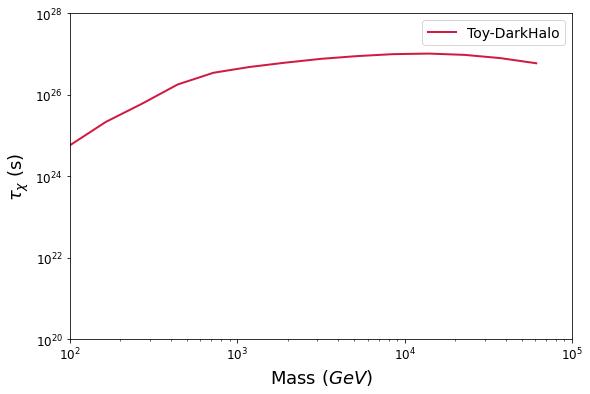

In [13]:
#   Plot the results
masses   = [row for row in table['Mass']]
lifetime = [row for row in table['ULLifetime']]

fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(masses, lifetime, color=(0.82, 0.10, 0.26), lw=2, label='Toy-DarkHalo')

ax.set_xlim(1.e+2, 1.e+5)
ax.set_ylim(1.e+20, 1.e+28)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mass $(GeV)$', fontsize=18)
ax.set_ylabel('$\\tau_{\\chi}$ (s)', fontsize=18)
ax.tick_params(labelsize=12)

ax.legend(loc='best', prop={'size':14})

plt.savefig('ToyDecay.png')
plt.show()

In [14]:
thistool.logFileClose()